# PROJECT - Superstore sales Prediction Model

In [39]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [7]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2498,2499,CA-2017-126935,19/05/2017,24/05/2017,Standard Class,BT-11395,Bill Tyler,Corporate,United States,San Francisco,California,94109.0,West,OFF-BI-10004817,Office Supplies,Binders,GBC Personal VeloBind Strips,9.584
5989,5990,CA-2017-163776,19/07/2017,25/07/2017,Standard Class,JS-16030,Joy Smith,Consumer,United States,Hattiesburg,Mississippi,39401.0,South,FUR-BO-10003546,Furniture,Bookcases,Hon 4-Shelf Metal Bookcases,504.900
6439,6440,CA-2015-166891,04/10/2015,06/10/2015,First Class,CC-12220,Chris Cortes,Consumer,United States,New York City,New York,10024.0,East,FUR-CH-10003298,Furniture,Chairs,Office Star - Contemporary Task Swivel chair w...,589.410
3223,3224,CA-2015-108189,02/10/2015,05/10/2015,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,Arizona,85281.0,West,OFF-FA-10000735,Office Supplies,Fasteners,Staples,4.672
5202,5203,CA-2016-142454,15/08/2016,19/08/2016,Standard Class,RE-19450,Richard Eichhorn,Consumer,United States,Oakland,California,94601.0,West,FUR-FU-10004018,Furniture,Furnishings,Tensor Computer Mounted Lamp,104.230
8155,8156,US-2018-143770,20/03/2018,24/03/2018,Standard Class,RD-19720,Roger Demir,Consumer,United States,Middletown,Connecticut,6457.0,East,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,61.960
6434,6435,CA-2016-121405,30/03/2016,04/04/2016,Standard Class,FC-14335,Fred Chung,Corporate,United States,Chicago,Illinois,60610.0,Central,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,180.960
9551,9552,CA-2016-147690,10/11/2016,14/11/2016,Standard Class,SC-20020,Sam Craven,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,577.584
7057,7058,CA-2017-165330,11/12/2017,11/12/2017,Same Day,WB-21850,William Brown,Consumer,United States,Anaheim,California,92804.0,West,FUR-TA-10004619,Furniture,Tables,Hon Non-Folding Utility Tables,892.136
3208,3209,CA-2017-108882,09/01/2017,15/01/2017,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Fresno,California,93727.0,West,TEC-AC-10000420,Technology,Accessories,Logitech G500s Laser Gaming Mouse with Adjusta...,349.950


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df.shape

(9800, 18)

In [10]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [11]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [12]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [14]:
df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')

In [15]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [17]:
df.sort_values(by=['Order Date'],inplace=True)

In [18]:
df['Ship Date'].value_counts()

2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-12-12    30
2018-09-06    30
              ..
2016-02-22     1
2016-02-20     1
2016-02-14     1
2016-02-16     1
2016-05-14     1
Name: Ship Date, Length: 1326, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

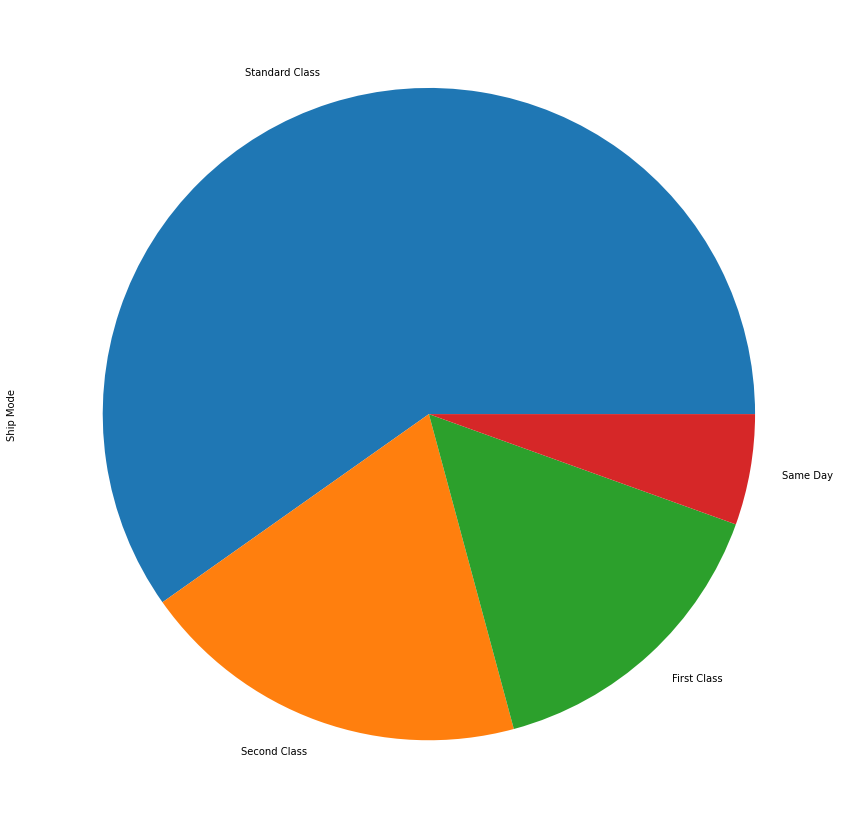

In [19]:
plt.figure(figsize=(20,15))
df['Ship Mode'].value_counts().plot.pie()

In [20]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [21]:
df['City'].value_counts()

New York City      891
Los Angeles        728
Philadelphia       532
San Francisco      500
Seattle            426
                  ... 
San Luis Obispo      1
Manhattan            1
Iowa City            1
Baytown              1
East Orange          1
Name: City, Length: 529, dtype: int64

<AxesSubplot:ylabel='City'>

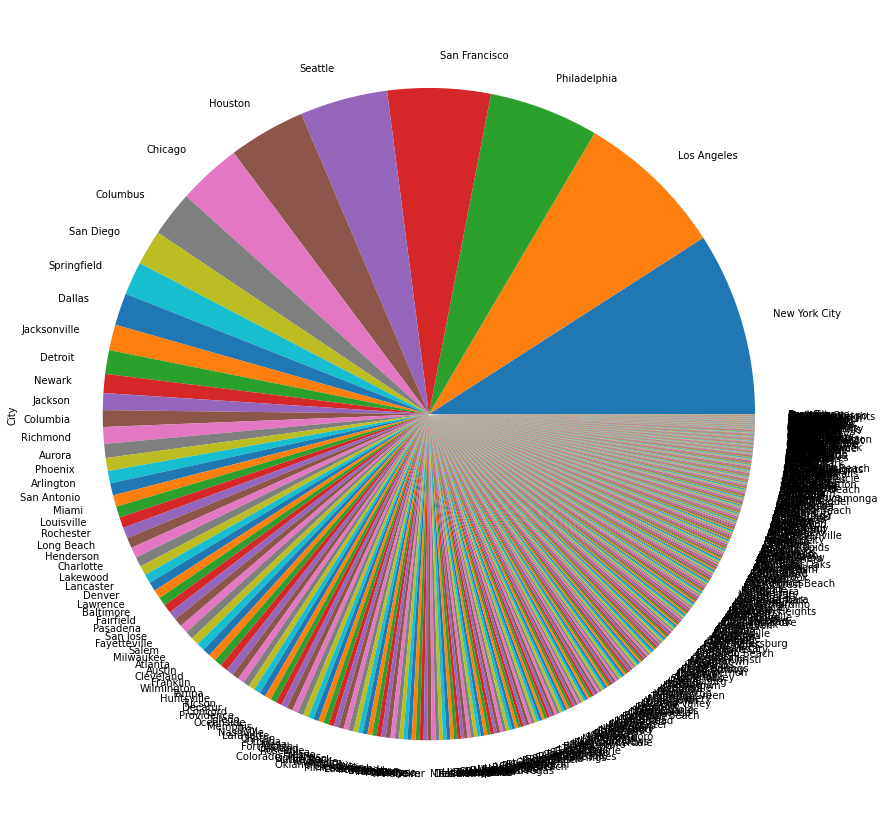

In [22]:
plt.figure(figsize=(20,15))
df['City'].value_counts().plot.pie()

/home/user/miniconda3/envs/AI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

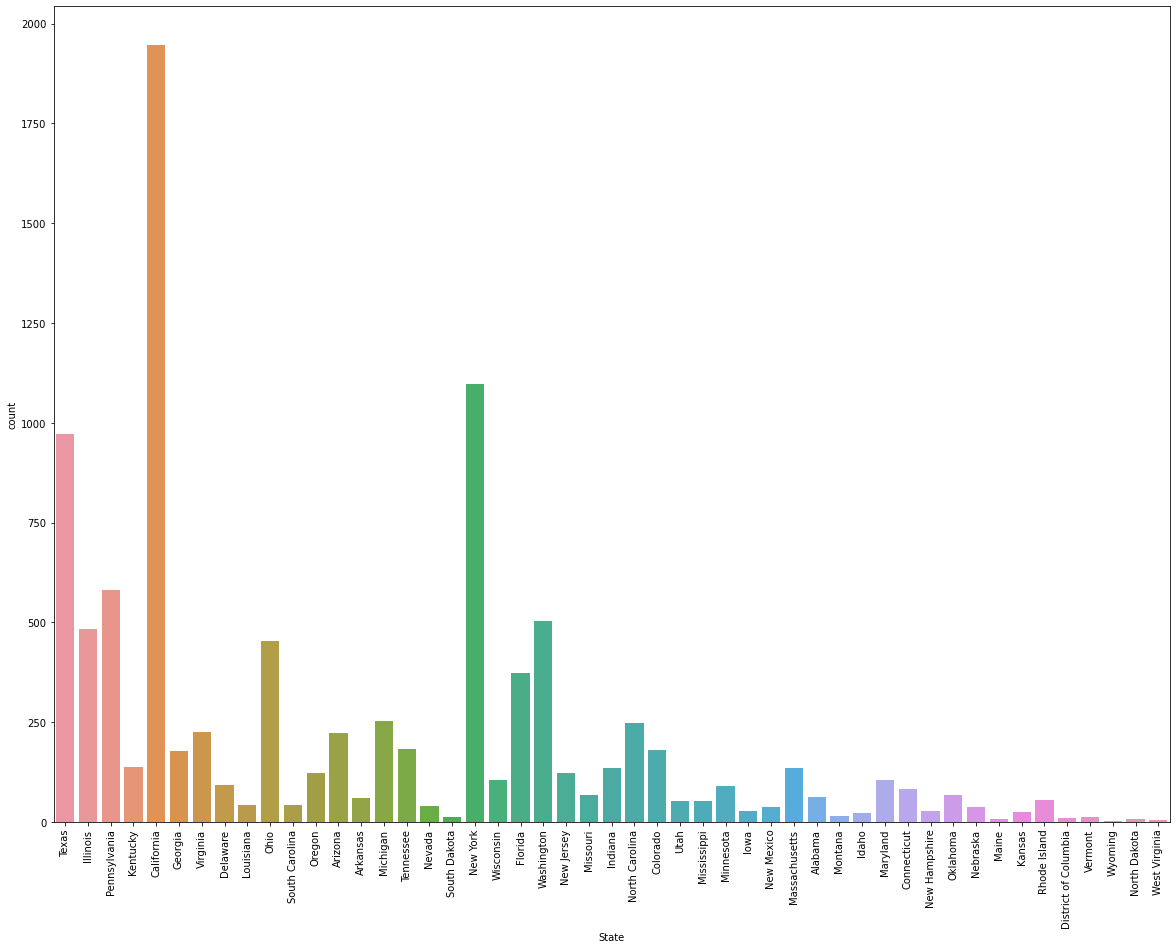

In [23]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='vertical')
sns.countplot('State',data=df)

In [24]:
top_states=df.groupby(['State']).sum().sort_values('State',ascending=False).head(10)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)

In [25]:
top_states

,State,Sales
0,Wyoming,1603.14
1,Wisconsin,31173.43
2,West Virginia,1209.82
3,Washington,135206.85
4,Virginia,70636.72
5,Vermont,8929.37
6,Utah,11220.06
7,Texas,168572.53
8,Tennessee,30661.87
9,South Dakota,1315.56


Text(0, 0.5, 'Revenu')

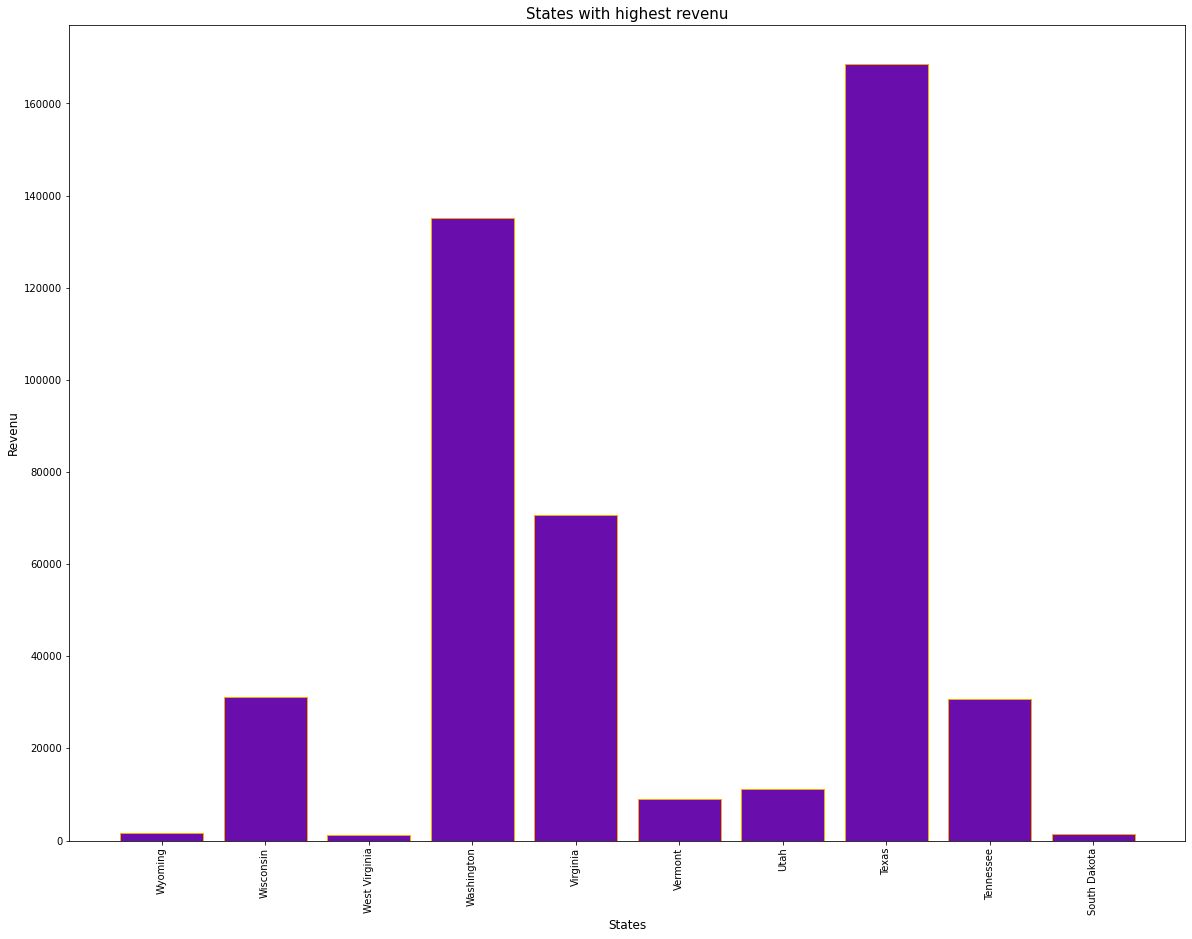

In [26]:
plt.figure(figsize=(20,15))
plt.bar(top_states['State'],top_states['Sales'],color='#6a0dad',edgecolor='orange')
plt.xticks(rotation='vertical')
plt.title('States with highest revenu',fontsize=15)
plt.xlabel('States',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [27]:
top_cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False).head(10)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


Text(0, 0.5, 'Revenu')

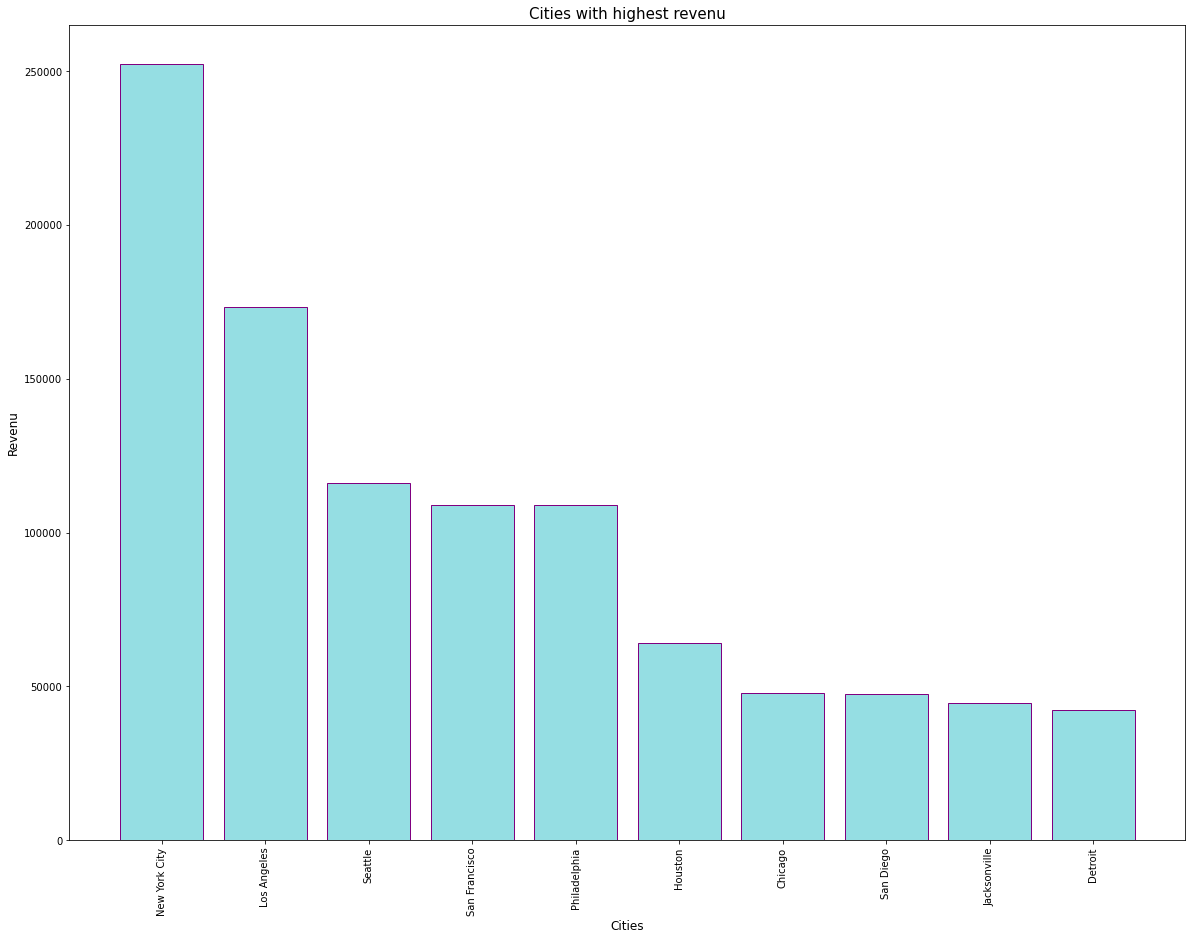

In [28]:
plt.figure(figsize=(20,15))
plt.bar(top_cities['City'],top_cities['Sales'],color='#95dee3',edgecolor='purple')
plt.xticks(rotation='vertical')
plt.title('Cities with highest revenu',fontsize=15)
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [29]:
top_customers=df.groupby(['Customer Name']).sum().sort_values('Sales',ascending=False).head(10)
top_customers=top_customers[['Sales']].round(2)
top_customers.reset_index(inplace=True)
top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


Text(0, 0.5, 'Revenu')

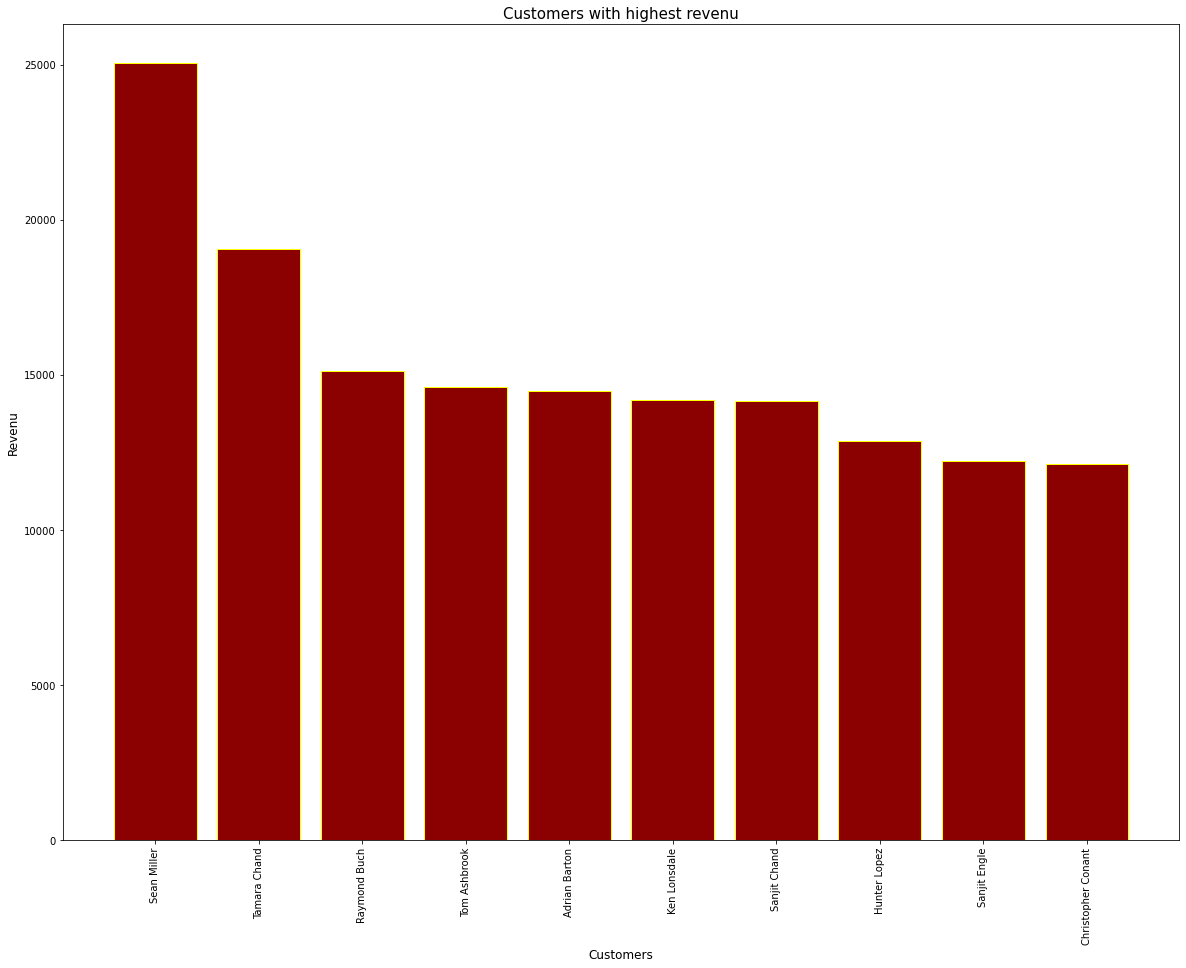

In [30]:
plt.figure(figsize=(20,15))
plt.bar(top_customers['Customer Name'],top_customers['Sales'],color='#8b0000',edgecolor='yellow')
plt.xticks(rotation='vertical')
plt.title('Customers with highest revenu',fontsize=15)
plt.xlabel('Customers',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [31]:
top_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(5)
top_products=top_products[['Sales']].round(2)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48


Text(0, 0.5, 'Revenu')

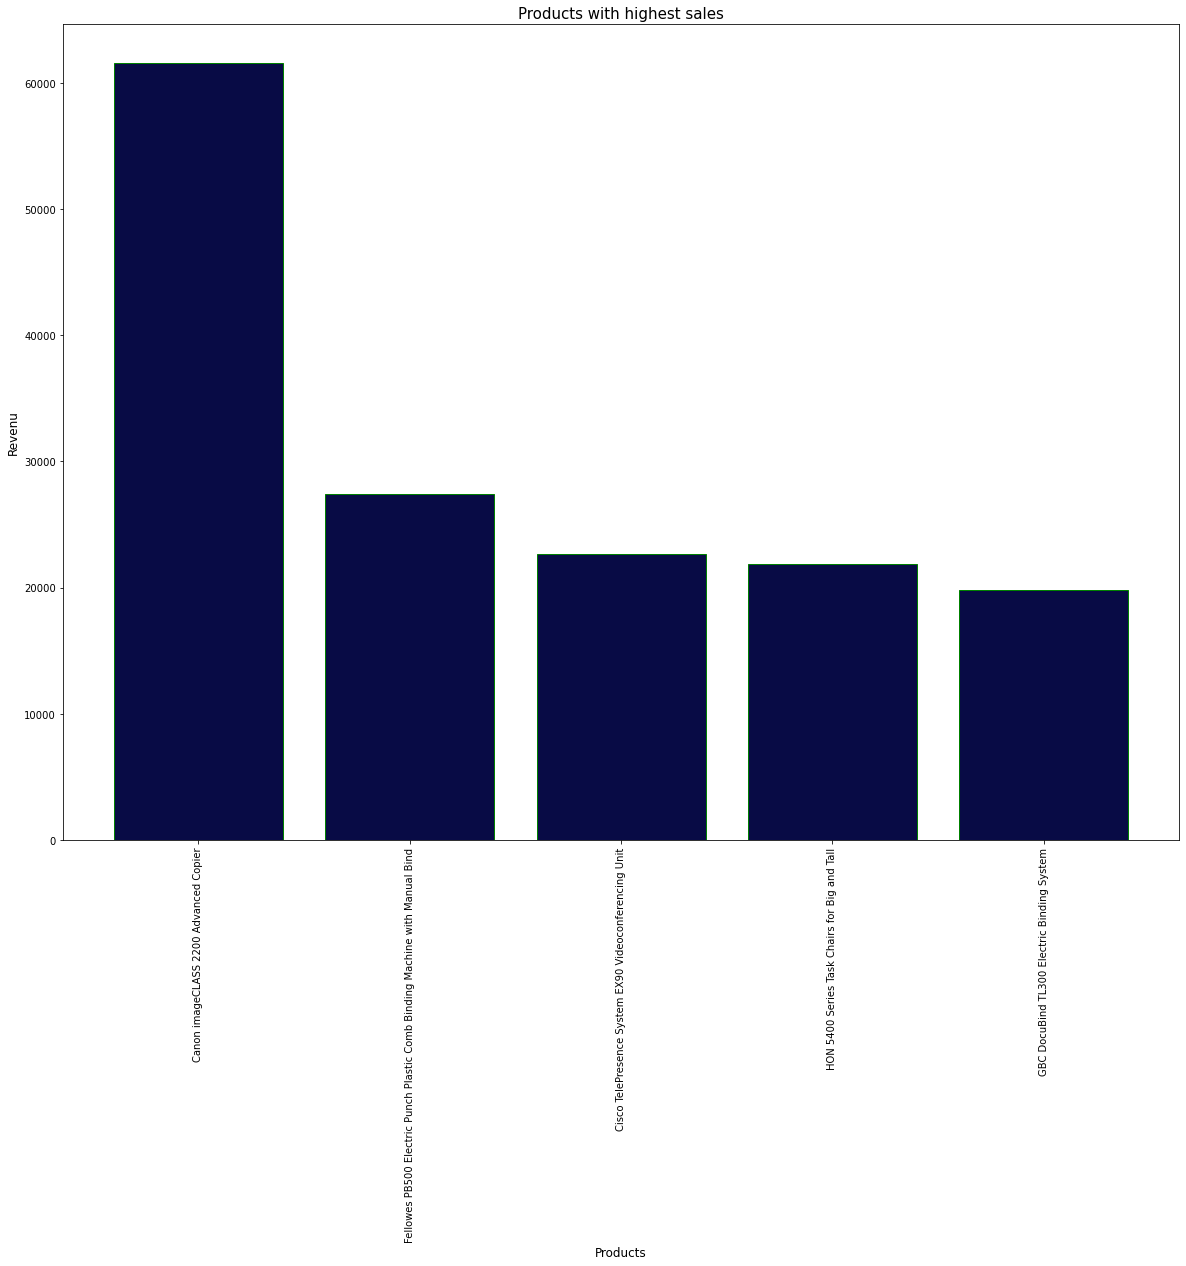

In [32]:
plt.figure(figsize=(20,15))
plt.bar(top_products['Product Name'],top_products['Sales'],color='#080b45',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Products with highest sales',fontsize=15)
plt.xlabel('Products',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [33]:
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

In [34]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015


<AxesSubplot:ylabel='year'>

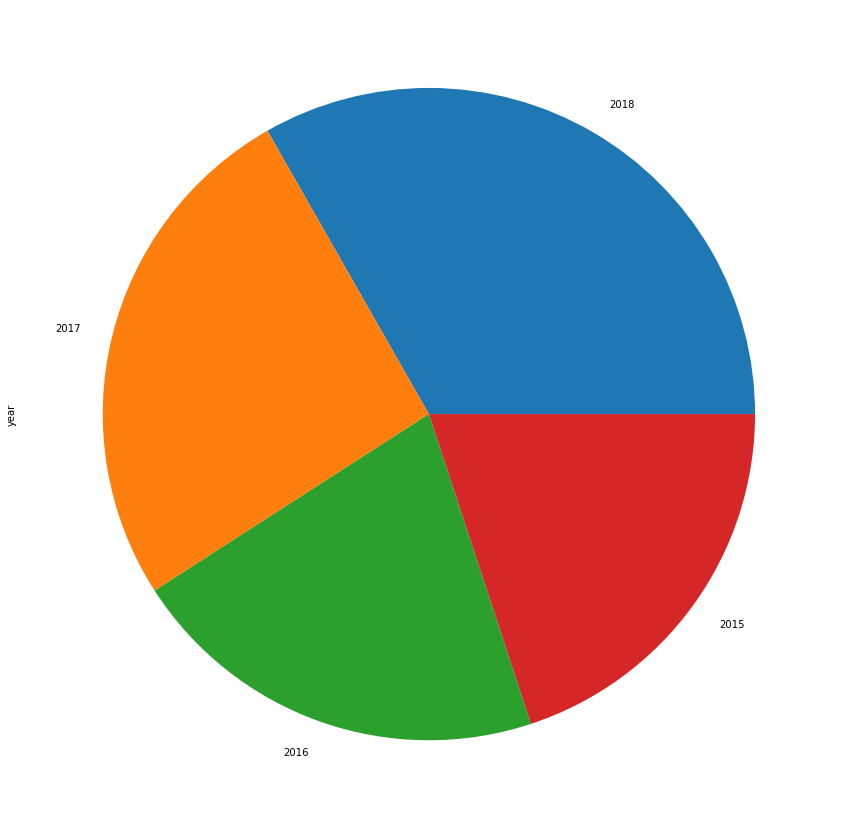

In [35]:
plt.figure(figsize=(20,15))
df['year'].value_counts().plot.pie()

In [36]:
year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=False).head(5)
year_sales.reset_index(inplace=True)
year_sales

,year,Row ID,Sales,day,month
0,2018,16313767,722052.0192,50088,25286
1,2017,12254092,600192.5500,38533,19606
2,2015,9508700,479856.2081,30706,15351
3,2016,9948341,459436.0054,32444,16378


In [37]:
sales_2018 = df[df['year']==2018]
sales_2018.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
8072,8073,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,1,1,2018
8071,8072,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,1,1,2018
8073,8074,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,1,1,2018
8074,8075,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,1,1,2018
6682,6683,CA-2018-154466,2018-01-01,2018-01-02,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,53132.0,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,1,1,2018


In [38]:
sales = df.groupby(['month']).sum().sort_values('Sales',ascending=False).head(5)
sales.reset_index(inplace=True)
sales

,month,Row ID,Sales,day,year
0,11,7108744,350161.7110,22062,2922156
1,12,6662904,321480.1695,20248,2787094
2,9,6712426,300103.4117,20029,2730652
3,10,3945431,199496.2947,12933,1631565
4,3,3517923,197573.5872,10870,1371361



insights
---------------------------------

    most of the people don't care about fast shipping
    most of my sales < %50 are comming from only 10 states
    most of my sales are comming from 5 cities in 5 states
    we have a winner product : Canon imageCLASS 2200 Advanced Copier

